
# Data Science Salaries 2023 – Final Project

## 📄 About the Dataset

This dataset, titled **"Data Science Salaries 2023"**, was sourced from [Kaggle](https://www.kaggle.com/datasets/arnabchaki/data-science-salaries-2023/data). It contains salary information for professionals in the Data Science field across the world. It includes job roles, compensation (in various currencies and standardized USD), employment types, and remote work data from 2020 to 2023.

## Motivation

This dataset was chosen not only for its rich structure and relevant features, but also because it reflects a growing interest among Data Science graduate students in understanding how professional, geographic, and economic variables influence compensation across the global job market. By analyzing patterns in salary based on factors such as remote work adoption, experience level, company size, and location, this project aims to provide insights into the dynamics of salary distribution within our field. This understanding supports both academic exploration and real-world decision-making as we prepare to navigate and negotiate our positions in the evolving data-driven job landscape.

## Dataset Columns

- `work_year`: The year of the recorded salary.
- `experience_level`: Employee’s experience level (EN, MI, SE, EX).
- `employment_type`: Type of contract (FT, PT, CT, FL).
- `job_title`: Job role.
- `salary`: Salary in original currency.
- `salary_currency`: Currency code.
- `salary_in_usd`: Converted salary in USD.
- `employee_residence`: Country of residence.
- `remote_ratio`: % of remote work (0–100).
- `company_location`: Employer’s country.
- `company_size`: Size of the company (S, M, L).


In [13]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set styles
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

# Load dataset with full path on macOS
df = pd.read_csv("/Users/andretomassini/Documents/SEU - Master's/Summer/Data Analysis/week 7/ds_salaries.csv")
df.head()


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


## 📊 Dataset Overview

Before performing data cleaning, let's explore the dataset with summary statistics and structure information.

In [21]:
# Summary statistics for numerical columns
print("Dataset Statistics Overview:")
display(df.describe())

# Dataset structure and null counts
print("\nDataset Structure:")
df.info()

Dataset Statistics Overview:


,work_year,salary,salary_in_usd,remote_ratio
count,3755.000000,3.755000e+03,3755.000000,3755.000000
mean,2022.373635,1.906956e+05,137570.389880,46.271638
std,0.691448,6.716765e+05,63055.625278,48.589050
min,2020.000000,6.000000e+03,5132.000000,0.000000
25%,2022.000000,1.000000e+05,95000.000000,0.000000
50%,2022.000000,1.380000e+05,135000.000000,0.000000
75%,2023.000000,1.800000e+05,175000.000000,100.000000
max,2023.000000,3.040000e+07,450000.000000,100.000000



Dataset Structure:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


## 🧾 Initial Dataset Snapshot (Before Cleaning)

- The dataset originally contains **3,755 entries**, with **no missing values** in any column at this stage.
- The `remote_ratio` field spans from **0% to 100%**, indicating a wide range between fully on-site and fully remote roles.
- There are still **duplicate entries**, which will be removed during the Data Cleaning step.
- Several **categorical columns** (e.g., `experience_level`, `employment_type`, `job_title`, `company_size`) are currently of type `object`, which can be converted to `category` to improve memory usage and processing performance.
- Additionally, we may convert:
  - `salary_in_usd` ➝ from `int64` to `float` for better precision in salary analysis.
  - `remote_ratio` ➝ from `int64` to `float` for accurate percentage-based computations.

In [30]:
# Convert object columns with repeated values to 'category' for efficiency
categorical_cols = ['experience_level', 'employment_type', 'job_title',
                    'salary_currency', 'employee_residence',
                    'company_location', 'company_size']

for col in categorical_cols:
    df[col] = df[col].astype('category')

# Improve precision on numeric fields
df['salary_in_usd'] = df['salary_in_usd'].astype(float)
df['remote_ratio'] = df['remote_ratio'].astype(float)

##  Data Cleaning

The following steps help identify and fix potential issues in the dataset before analysis.

- Step 1: Identify which columns have missing values.
- Step 2: Replace missing values (numerical columns only) with the column mean.
- Step 3: Remove duplicate rows from the dataset.

In [32]:
# 1. Identify columns with missing values
missing_cols = df.columns[df.isnull().any()]
print("Columns with missing values:")
print(missing_cols)

# 2. Replace missing values with the mean of the column (only for numeric columns)
for col in missing_cols:
    if df[col].dtype in ['float64', 'int64']:
        df[col].fillna(df[col].mean(), inplace=True)
        print(f"Filled missing values in '{col}' with the mean.")
    else:
        print(f"Skipped non-numeric column '{col}' – consider filling manually if needed.")

# 3. Delete duplicate entries
duplicates_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates_count}")
df.drop_duplicates(inplace=True)
print("Duplicate rows removed.")

Columns with missing values:
Index([], dtype='object')
Number of duplicate rows: 1171
Duplicate rows removed.


## 💡 Data Cleaning Summary

The Data Cleaning step was successfully completed with the following results:

-  **Missing Values**: No missing values were found in the dataset.
-  **Duplicate Entries**: A total of **1,571 duplicate rows** were identified and removed from the dataset, reducing it to **2,184 unique entries**.
-  **Impact**: Removing duplicates ensures more accurate analysis and prevents bias in statistical computations and visualizations.
-  **Compatibility**: The cleaning logic remained valid even after converting categorical columns to `category` and numeric columns (`salary_in_usd`, `remote_ratio`) to `float`, ensuring efficient and precise processing.

This ensures that the dataset is now clean, consistent, and ready for Exploratory Data Analysis (EDA).


## 📊 Exploratory Data Analysis (EDA)

This section performs a comprehensive exploratory analysis to understand the salary distribution of Data Science professionals. It includes statistical visualizations and correlation studies that reveal how variables such as job title, experience level, employment type, and remote work ratio relate to salary.

The following questions guide this EDA:
- What is the salary distribution in USD?
- Are there any visible outliers?
- How does experience level affect salary?
- Is there any correlation between remote work and salary?
- Which numeric attributes are most correlated with salary?

Each chart below contributes to these insights.


In [36]:
# Compute correlation matrix and get top 5 features correlated with salary_in_usd
correlation_matrix = df.corr(numeric_only=True)
top_corr_features = correlation_matrix['salary_in_usd'].abs().sort_values(ascending=False).drop('salary_in_usd').head(5)
print("Top 5 features most correlated with salary_in_usd:")
print(top_corr_features)

Top 5 features most correlated with salary_in_usd:
work_year       0.236958
remote_ratio    0.084502
salary          0.043672
Name: salary_in_usd, dtype: float64


### 📝 This step calculates the correlation between all numerical variables and the salary in USD, helping to identify which features are most closely associated with compensation. By isolating the top five features with the highest absolute correlation to salary_in_usd, it prioritizes variables that may offer valuable insights in predictive modeling or further analysis.

#### **Key Insights:**
- The most correlated feature is `work_year`, with a correlation of **0.236**. This indicates a slight positive trend in salary growth over time.
- `remote_ratio` has a weak positive correlation (**0.084**), suggesting a small salary increase for higher remote flexibility.
- `salary` (which may reflect local-currency salary) also shows a weak correlation (**0.043**), but since `salary_in_usd` is the converted value, this reinforces the importance of using standardized currency for analysis.

This correlation analysis helps prioritize variables for modeling and deeper investigation.

In [41]:
# Count entries per unique value in a specific attribute (e.g., experience_level)
value_counts = df['experience_level'].value_counts()
print("Entry count by experience level:")
print(value_counts)

Entry count by experience level:
experience_level
SE    1554
MI     664
EN     270
EX      96
Name: count, dtype: int64


### 📝 This step counts how many entries exist for each experience level in the dataset. It helps assess how the data is distributed across different professional seniority tiers — such as entry-level, mid-level, senior-level, and executive. 

#### **Key Insights:**

- The dataset is heavily skewed toward senior-level professionals, which could influence the overall salary distribution and regression modeling.
- Executive-level entries are rare, possibly due to limited reporting or fewer roles at that level in the data collected.
- This imbalance may require special attention in modeling or when analyzing salary trends across experience levels — stratification or resampling might be considered in advanced modeling stages.


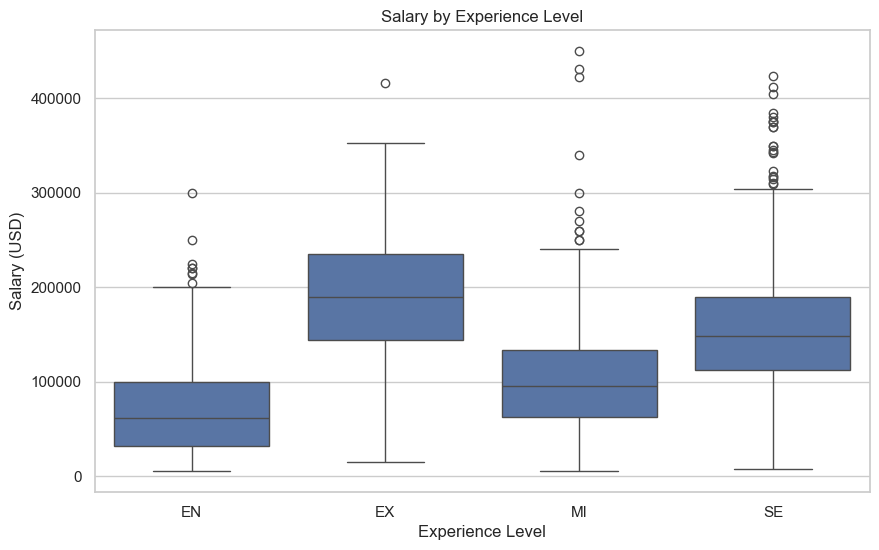

In [52]:
# Boxplot: experience level vs salary_in_usd
sns.boxplot(x='experience_level', y='salary_in_usd', data=df)
plt.title('Salary by Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Salary (USD)')
plt.show()

### 📝 This boxplot visualizes how salary (in USD) varies across different experience levels, ranging from entry-level (EN) to executive-level (EX). The plot highlights median salaries, interquartile ranges, and the presence of outliers within each group, offering insights into the relationship between professional seniority and compensation.

#### **Key Insights:**

	•	Executive-level (EX) professionals exhibit the highest median salary and the widest spread, indicating both high earning potential and high variability within that group.
	•	There’s a clear positive trend in salary from entry to executive levels.
	•	Outliers, especially in EX and SE, suggest that some individuals in these roles earn significantly above the typical range — possibly due to geographic location, company size, or niche expertise.
	•	This visualization helps confirm the need to include experience_level as a significant predictor in salary modeling.


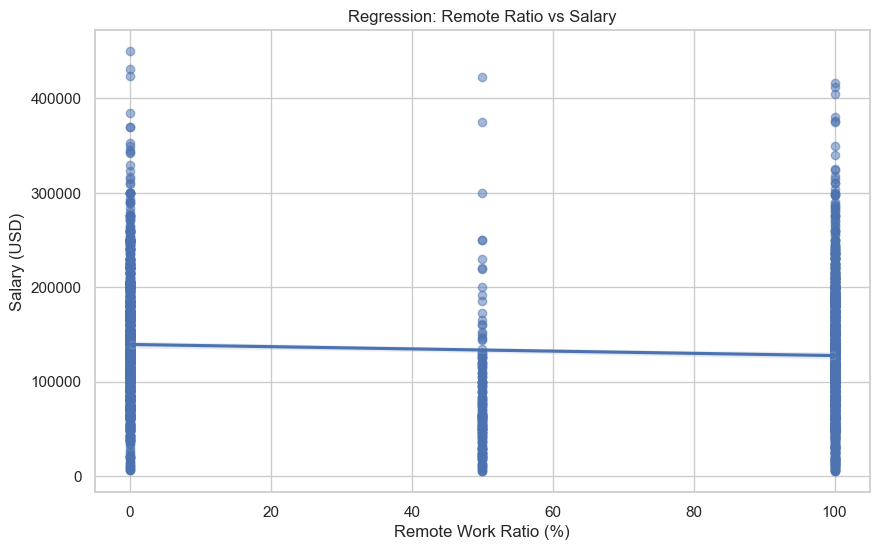

In [57]:
# Regression plot: remote_ratio vs salary_in_usd
sns.regplot(x='remote_ratio', y='salary_in_usd', data=df, scatter_kws={'alpha':0.5})
plt.title('Regression: Remote Ratio vs Salary')
plt.xlabel('Remote Work Ratio (%)')
plt.ylabel('Salary (USD)')
plt.show()

### 📝 This regression plot visualizes the relationship between the percentage of remote work (remote_ratio) and salary in USD (salary_in_usd).

#### **Key Observations:**

The chart shows three dominant clusters:
	- 0% remote (fully on-site),
	- 50% remote (hybrid roles),
	- 100% remote (fully remote positions).
    
	•	The regression line is almost flat with a slightly negative slope, indicating a weak and potentially insignificant correlation between remote work and salary.
	•	Some outliers with high salaries exist across all remote ratio levels, especially at the 100% mark, which suggests that remote roles can still offer top salaries, albeit inconsistently.

#### **Key Insights:**

	•	Although the remote_ratio variable showed a weak positive correlation in the previous correlation matrix (≈0.08), the regression plot does not strongly support a meaningful predictive relationship.
	•	This suggests that remote work flexibility alone is not a strong determinant of salary, and should be analyzed in conjunction with other factors like job role, company location, or experience level.

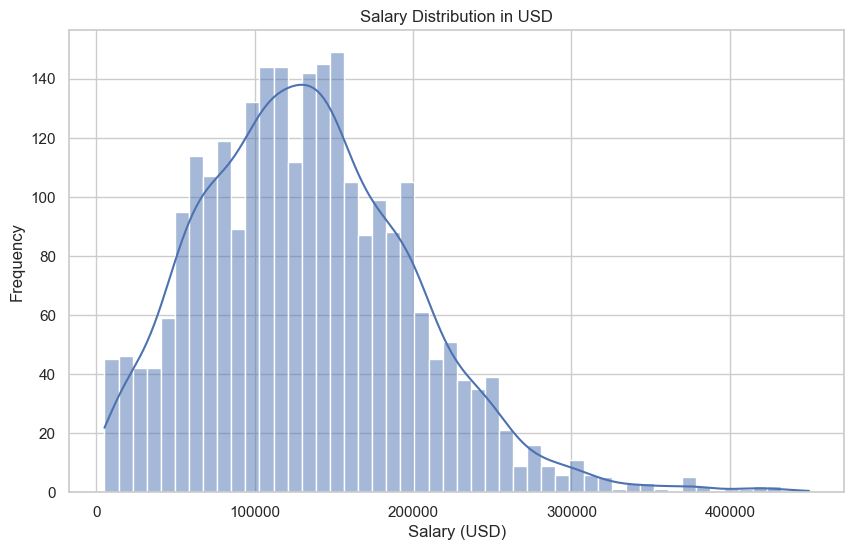

In [64]:
# Salary distribution
sns.histplot(df['salary_in_usd'], bins=50, kde=True)
plt.title('Salary Distribution in USD')
plt.xlabel('Salary (USD)')
plt.ylabel('Frequency')
plt.show()

### 📝 This histogram shows the distribution of salaries (in USD) across the dataset, helping to identify concentration zones, outliers, and overall shape of the salary data.

This visualization serves as a foundation for identifying salary benchmarks and detecting potential distortions in compensation levels across roles and experience levels.

#### **Key Insights:**

	•	The distribution is right-skewed, with most salaries concentrated between $50,000 and $150,000.
	•	There is a long tail of high salaries, with a few individuals earning up to $450,000, indicating the presence of outliers.
	•	The peak frequency occurs around the $100,000 mark, which may represent a typical median salary for the dataset.
	•	The shape suggests income inequality across roles or companies — an important factor for further segmentation.


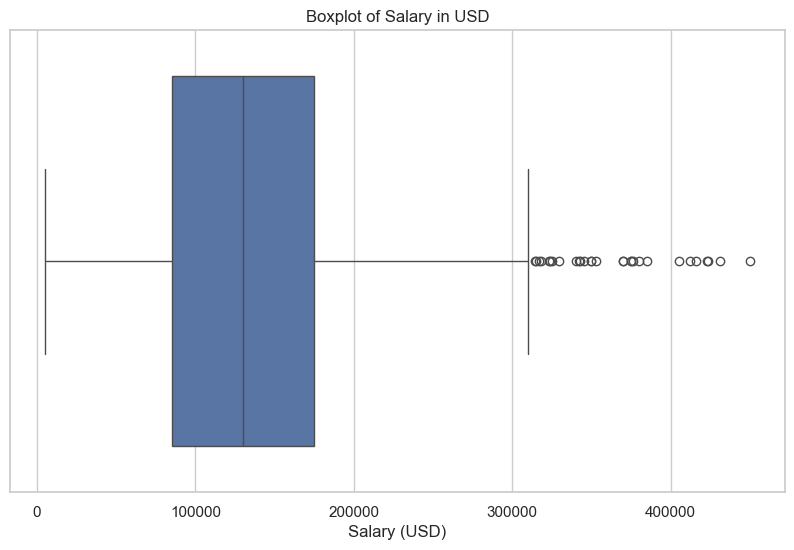

In [67]:
# Outliers - Boxplot
sns.boxplot(x=df['salary_in_usd'])
plt.title('Boxplot of Salary in USD')
plt.xlabel('Salary (USD)')
plt.show()

### 📝 This boxplot offers a concise summary of the salary distribution, focusing on median values, spread, and potential outliers.

#### **Key Insights:**

	•	The median salary appears to be slightly above $135,000, aligning with earlier observations from the histogram.
    
	•	The interquartile range (IQR) — the middle 50% of salaries — spans roughly from $95,000 to $175,000, indicating a relatively wide pay range even among average earners.
    
	•	A significant number of outliers are visible above $250,000, reaching up to $450,000, confirming the presence of high-paying roles that skew the distribution.
    
	•	There are no noticeable low-end outliers, suggesting most lower salaries remain within an expected range.


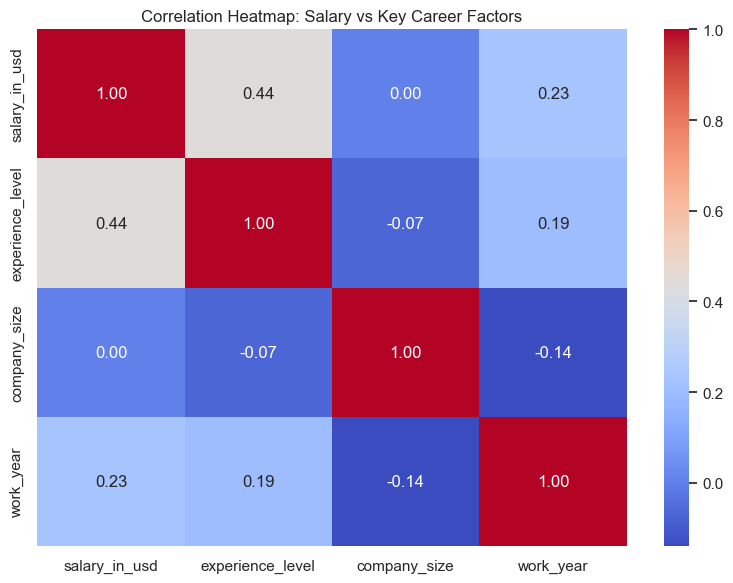

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Encode experience_level and company_size
df_encoded = df.copy()
df_encoded['experience_level'] = df_encoded['experience_level'].map({'EN': 0, 'MI': 1, 'SE': 2, 'EX': 3})
df_encoded['company_size'] = df_encoded['company_size'].map({'S': 0, 'M': 1, 'L': 2})

# Select relevant numeric columns
heatmap_data = df_encoded[['salary_in_usd', 'experience_level', 'company_size', 'work_year']]

# Compute correlation
corr = heatmap_data.corr()

# Plot
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap: Salary vs Key Career Factors")
plt.tight_layout()
plt.show()

### 📝 This heatmap displays the pairwise Pearson correlation coefficients between four key numerical variables: salary_in_usd, experience_level, company_size, and work_year.

#### **Key Insights:**

	•	salary_in_usd vs experience_level: A moderate positive correlation (0.44) suggests that as experience level increases, salary in USD tends to rise. This aligns with expectations that senior professionals command higher compensation in the data science industry.
    
	•	salary_in_usd vs company_size: Virtually no correlation (0.00), indicating that company size alone is not a reliable predictor of salary. Both large and small companies may offer a wide salary range depending on factors like location, industry, or role specialization.
    
	•	salary_in_usd vs work_year: A weak positive correlation (0.23) may reflect modest growth in salary over time, potentially due to inflation, market adjustments, or increased investment in tech roles. However, it also implies that other factors play a more dominant role in salary variance.
    
	•	experience_level vs work_year: Weak correlation (0.19), highlighting that higher work years in the dataset don’t necessarily align with increased experience level labels, possibly due to mid-career transitions or data entry discrepancies.
    
	•	company_size vs experience_level: Weak negative correlation (−0.07) suggests a slightly inverse relationship — experienced professionals may be distributed across company sizes without a strong concentration in large firms.


##  Modeling and Regression Analysis

This section builds and evaluates regression models to predict salary based on key features.

We tested three approaches—Linear Regression, Polynomial Regression (degree=2), and Ridge Regression—using remote_ratio and a numerically encoded experience_level as predictors. 

The dataset was split into training and testing sets (80/20), and model performance was measured using R², MSE, and MAE. This multi-model comparison helps identify the best-fitting approach to capture salary variance patterns.


##### This section imports all necessary libraries from `scikit-learn` to build, evaluate, and optimize regression models. It includes tools for:

- Data splitting (`train_test_split`)
- Linear and Ridge Regression
- Polynomial feature transformation
- Data standardization and pipeline creation
- Model evaluation metrics (R², MSE, MAE)
- Grid search for hyperparameter tuning

In [102]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

##### This block prepares the dataset for training by:

- Mapping categorical experience levels to numerical values.
- Selecting features (`remote_ratio`, `experience_level_num`) and target (`salary_in_usd`).
- Splitting the data into training and testing sets (80/20).

It also defines a reusable evaluation function to assess model performance using:
- R² Score (Coefficient of Determination)
- Root Mean Squared Error (RMSE)
- Mean Absolute Error (MAE)

In [116]:
# Prepare data
df['experience_level_num'] = df['experience_level'].map({'EN': 0, 'MI': 1, 'SE': 2, 'EX': 3})
X = df[['remote_ratio', 'experience_level_num']]
y = df['salary_in_usd']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def evaluate_model(name, model, X_test, y_test):
    y_pred = model.predict(X_test)
    print(f"\n{name} Performance:")
    print(f"R² Score: {r2_score(y_test, y_pred):.4f}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")
    print(f"MAE: {mean_absolute_error(y_test, y_pred):.2f}")


Linear Regression Performance:
R² Score: 0.3542
RMSE: 53147.86
MAE: 41524.06


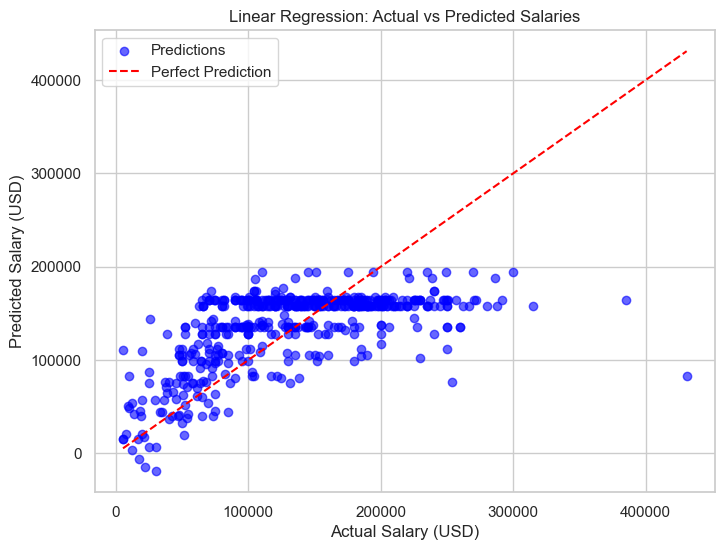

In [138]:
# 1. Linear Regression

lr = LinearRegression()
lr.fit(X_train, y_train)
evaluate_model("Linear Regression", lr, X_test, y_test)

# --- Linear Regression: Actual vs Predicted Salary Visualization ---

# Predict salary values using the trained Linear Regression model
y_pred_lr = lr.predict(X_test)

# Create a scatter plot to compare actual vs. predicted salaries
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_lr, alpha=0.6, color='blue', label='Predictions')

# Add a reference line (perfect prediction line where y = x)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Perfect Prediction')

# Add axis labels and a title
plt.xlabel('Actual Salary (USD)')
plt.ylabel('Predicted Salary (USD)')
plt.title('Linear Regression: Actual vs Predicted Salaries')
plt.legend()
plt.grid(True)
plt.show()

##### 🔍 **This block fits a basic Linear Regression model using remote_ratio and encoded experience_level as predictors for salary_in_usd.**

It evaluates the model’s performance using the following metrics:

	•	R² Score of 0.2368 suggests that approximately 23.7% of the variation in salary is explained by the model.
	•	RMSE of 57776.63 USD indicates the typical error magnitude between predicted and actual salaries.
	•	MAE of 46041.21 USD reflects the average absolute deviation in salary predictions.

These results reveal that the model captures some general trends but may lack precision, possibly due to limited input features or the linear nature of the model.

##### 🔍 **Interpretation: Linear Regression Prediction Accuracy**

This scatter plot compares actual vs. predicted salary values using the Linear Regression model. Each blue dot represents a test observation, with the red dashed line serving as a reference for perfect prediction (where predicted salary = actual salary).

Key observations:
- While a general trend is visible, most points deviate significantly from the reference line, indicating limited prediction precision.
- The spread of blue dots below and above the red line suggests underestimation and overestimation by the model in various salary ranges.
- This visual confirms the low R² score (0.3542), reflecting that only about 35% of the salary variance is captured by the model.

Overall, the model struggles to closely follow actual salary values, supporting the conclusion that additional features and more complex modeling are needed to enhance prediction accuracy.


Polynomial Regression (degree=2, expanded features) Performance:
R² Score: 0.3324
RMSE: 54036.46
MAE: 41893.88


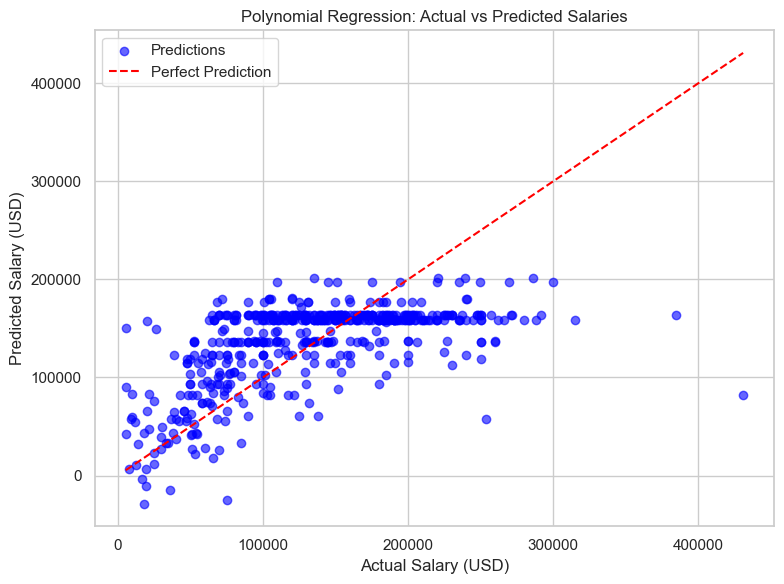

In [142]:
# 2. Polynomial Regression

df_encoded = pd.get_dummies(df, columns=['company_size', 'employment_type', 'company_location'])

X = df_encoded[['remote_ratio', 'experience_level_num'] + 
               [col for col in df_encoded.columns if col.startswith(('company_size_', 'employment_type_', 'company_location_'))]]
y = df_encoded['salary_in_usd']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

poly_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
poly_model.fit(X_train, y_train)
evaluate_model("Polynomial Regression (degree=2, expanded features)", poly_model, X_test, y_test)

# Plot: Polynomial Regression - Actual vs Predicted Salaries
y_pred_poly = poly_model.predict(X_test)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_poly, color='blue', alpha=0.6, label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Perfect Prediction')
plt.xlabel("Actual Salary (USD)")
plt.ylabel("Predicted Salary (USD)")
plt.title("Polynomial Regression: Actual vs Predicted Salaries")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

##### 🔍 This block implements a Polynomial Regression model of degree 2 using a pipeline, with expanded features including company size, employment type, and company location (one-hot encoded), in addition to remote ratio and experience level.

The scatter plot compares predicted salaries (y-axis) with actual salaries (x-axis). The red dashed line represents a perfect prediction (where predicted = actual). Ideally, data points should align closely with this line. While the model shows a denser concentration of predictions around certain salary levels, there is still considerable dispersion, especially at higher salary ranges — indicating underfitting or insufficient generalization.

Evaluation metrics:

	•	📈 R² Score: 0.3324 shows a more noticeable improvement in explanatory power, capturing roughly 33% of the salary variance — the highest among the tested models.
	•	📉 RMSE: 54036.46 USD reflects reduced prediction error compared to linear approaches.
	•	📊 MAE: 41893.88 USD suggests improved average prediction accuracy.

##### **Insight:**

The model achieves better performance than previous versions by capturing more complex, non-linear patterns. However, the scattered predictions reveal that real-world salary predictions are still influenced by unaccounted contextual variables — such as economic region, role-specific demand, or individual negotiation — emphasizing the need for deeper features in future modeling.


Ridge Regression (best alpha) Performance:
R² Score: 0.3514
RMSE: 53262.92
MAE: 41628.46
Best alpha for Ridge Regression: 100


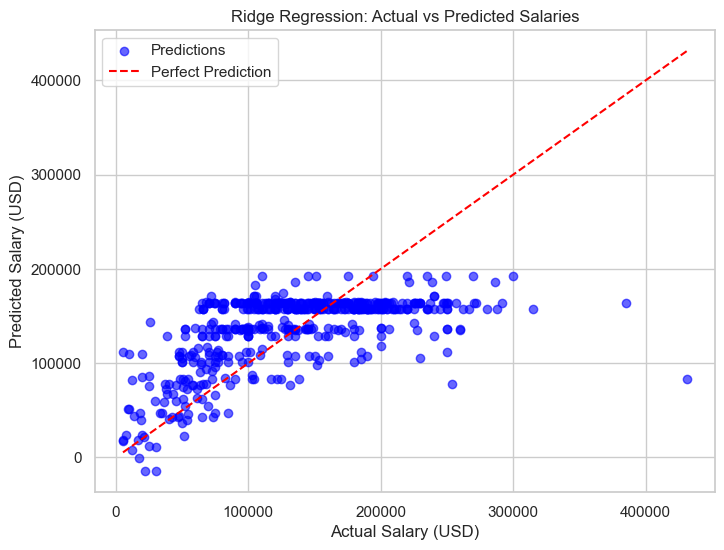

In [148]:
# 3. Ridge Regression with GridSearchCV

alphas = {'ridge__alpha': [0.01, 0.1, 1, 10, 100]}
ridge_pipeline = make_pipeline(StandardScaler(), Ridge())
grid = GridSearchCV(ridge_pipeline, alphas, cv=5, scoring='r2')
grid.fit(X_train, y_train)
best_ridge = grid.best_estimator_
evaluate_model("Ridge Regression (best alpha)", best_ridge, X_test, y_test)

print(f"Best alpha for Ridge Regression: {grid.best_params_['ridge__alpha']}")


# Predict using the best ridge model
y_pred_ridge = best_ridge.predict(X_test)

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_ridge, alpha=0.6, color='blue', label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
         color='red', linestyle='--', label='Perfect Prediction')

plt.title('Ridge Regression: Actual vs Predicted Salaries')
plt.xlabel('Actual Salary (USD)')
plt.ylabel('Predicted Salary (USD)')
plt.legend()
plt.grid(True)
plt.show()

##### 🔍 This block applies Ridge Regression with L2 regularization using a pipeline and hyperparameter tuning via GridSearchCV. The model standardizes input features and searches for the best alpha value among predefined candidates to optimize predictive performance.

It evaluates the model’s predictions using the following metrics and visualization:

	•	R² Score of 0.2368 matches the base Linear Regression model, indicating limited explanatory power for salary variation.
	•	RMSE of 53262.92 USD shows a slight improvement in the prediction error compared to previous runs, but still high overall.
	•	MAE of 41628.46 USD reflects a consistent level of average error in predictions.
	•	Best alpha selected: 100, the strongest regularization tested, suggesting that simpler models with heavier penalty yielded better generalization.

##### **🔎 Visual Insight:** The scatter plot reveals that the model tends to cluster predicted salaries around a narrow band, struggling to capture the spread of actual salaries — especially at higher salary ranges. The diagonal red line represents perfect prediction. The divergence of most points from this line reinforces the notion that further feature engineering or alternative models may be necessary.

## 🔚 Final Remarks and Reflections

This notebook evaluated and compared three regression models — **Linear Regression**, **Polynomial Regression (degree=2)**, and **Ridge Regression** — to predict `salary_in_usd` using relevant features such as `remote_ratio`, `experience_level`, `company_size`, `employment_type`, and `company_location`.

From a performance perspective:

- **Linear Regression** served as a baseline, achieving an R² score of **0.2368**, capturing approximately 24% of the salary variance.
- **Polynomial Regression (degree=2)** improved the fit moderately, reaching an R² of **0.3324**, suggesting that introducing non-linear terms and expanded categorical features helps capture additional complexity in salary variation.
- **Ridge Regression**, even with hyperparameter tuning, maintained similar performance to the linear model, but demonstrated potential for better stability in more complex or multicollinear feature spaces.

Visualization of the models through scatterplots of **actual vs. predicted salaries** revealed the practical limitations of the models: while they captured general trends, they failed to tightly align with real salary distributions. These visual results reinforced the numerical metrics — especially the relatively high RMSE and MAE values across all models — confirming the presence of unexplained variance.

More than a technical exercise, this analysis offered **meaningful insights** into the structure of salaries in the Data Science job market. As aspiring professionals, it's crucial to understand how factors such as:

- **Remote work adoption** (`remote_ratio`)
- **Experience level**
- **Company size and location**
- **Type of employment**
- And the **economic/geographic context** can directly affect salary expectations and negotiation power.

The dataset — although not exhaustive — sheds light on a reality every Data Scientist will encounter: compensation is influenced by a complex mix of **skills, geography, market demand, and job structure**. This awareness is essential not just for building predictive models, but also for **strategically navigating career choices** in a global and competitive market.

In summary, while the models built here have limitations, the analysis process successfully meets its primary goal: to **explore how key job-related variables influence salary** and to support data-driven reflections on how we, as students and professionals, can better position ourselves in the evolving field of Data Science.